In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [55]:
ds=pd.read_csv('abalone.csv')

In [56]:
ds

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
5      I   0.425     0.300   0.095        0.3515          0.1410   
6      F   0.530     0.415   0.150        0.7775          0.2370   
7      F   0.545     0.425   0.125        0.7680          0.2940   
8      M   0.475     0.370   0.125        0.5095          0.2165   
9      F   0.550     0.440   0.150        0.8945          0.3145   
10     F   0.525     0.380   0.140        0.6065          0.1940   
11     M   0.430     0.350   0.110        0.4060          0.1675   
12     M   0.490     0.380   0.135        0.5415          0.2175   
13     F   0.535     0.405   0.145        0.6845          0.2725   
14     F   0.470     0.355   0.100        0.4755          0.1675   
15     M   0.500     0.400   0.130        0.6645          0.2580   
16     I   0.355     0.280   0.085        0.2905          0.0950   
17     F   0.440     0.340   0.100        0.4510          0.1880   
18     M   0.365     0.295   0.080        0.2555          0.0970   
19     M   0.450     0.320   0.100        0.3810          0.1705   
20     M   0.355     0.280   0.095        0.2455          0.0955   
21     I   0.380     0.275   0.100        0.2255          0.0800   
22     F   0.565     0.440   0.155        0.9395          0.4275   
23     F   0.550     0.415   0.135        0.7635          0.3180   
24     F   0.615     0.480   0.165        1.1615          0.5130   
25     F   0.560     0.440   0.140        0.9285          0.3825   
26     F   0.580     0.450   0.185        0.9955          0.3945   
27     M   0.590     0.445   0.140        0.9310          0.3560   
28     M   0.605     0.475   0.180        0.9365          0.3940   
29     M   0.575     0.425   0.140        0.8635          0.3930   
30     M   0.580     0.470   0.165        0.9975          0.3935   
31     F   0.680     0.560   0.165        1.6390          0.6055   
32     M   0.665     0.525   0.165        1.3380          0.5515   
33     F   0.680     0.550   0.175        1.7980          0.8150   
34     F   0.705     0.550   0.200        1.7095          0.6330   
35     M   0.465     0.355   0.105        0.4795          0.2270   
36     F   0.540     0.475   0.155        1.2170          0.5305   
37     F   0.450     0.355   0.105        0.5225          0.2370   
38     F   0.575     0.445   0.135        0.8830          0.3810   
39     M   0.355     0.290   0.090        0.3275          0.1340   
40     F   0.450     0.335   0.105        0.4250          0.1865   
41     F   0.550     0.425   0.135        0.8515          0.3620   
42     I   0.240     0.175   0.045        0.0700          0.0315   
43     I   0.205     0.150   0.055        0.0420          0.0255   
44     I   0.210     0.150   0.050        0.0420          0.0175   
45     I   0.390     0.295   0.095        0.2030          0.0875   
46     M   0.470     0.370   0.120        0.5795          0.2930   
47     F   0.460     0.375   0.120        0.4605          0.1775   
48     I   0.325     0.245   0.070        0.1610          0.0755   
49     F   0.525     0.425   0.160        0.8355          0.3545   
50     I   0.520     0.410   0.120        0.5950          0.2385   
51     M   0.400     0.320   0.095        0.3030          0.1335   
52     M   0.485     0.360   0.130        0.5415          0.2595   
53     F   0.470     0.360   0.120        0.4775          0.2105   
54     M   0.405     0.310   0.100        0.3850          0.1730   
55     F   0.500     0.400   0.140        0.6615          0.2565   
56     M   0.445     0.350   0.120        0.4425          0.1920   
57     M   0.470     0.385   0.135        0.5895          0.2

In [57]:
ds.shape

(4177, 9)

## Dataset has 9 variable, 
Length, Diameter, Height,Whole weight, Shucked weight, Viscera weight, Shell weight, Rings are independent variable.
Sex is the dependent Veriable.

In [58]:
ds.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Target Veriable is string type veriable, while Rings are Integer type, all other veriables are float.

In [59]:
pd.set_option('display.max_row',None)

In [60]:
# Check if data has any non numeric value

ds.applymap(lambda x: isinstance(x, str))

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0     True   False     False   False         False           False   
1     True   False     False   False         False           False   
2     True   False     False   False         False           False   
3     True   False     False   False         False           False   
4     True   False     False   False         False           False   
5     True   False     False   False         False           False   
6     True   False     False   False         False           False   
7     True   False     False   False         False           False   
8     True   False     False   False         False           False   
9     True   False     False   False         False           False   
10    True   False     False   False         False           False   
11    True   False     False   False         False           False   
12    True   False     False   False         False           False   
13    True   False     False   False         False           False   
14    True   False     False   False         False           False   
15    True   False     False   False         False           False   
16    True   False     False   False         False           False   
17    True   False     False   False         False           False   
18    True   False     False   False         False           False   
19    True   False     False   False         False           False   
20    True   False     False   False         False           False   
21    True   False     False   False         False           False   
22    True   False     False   False         False           False   
23    True   False     False   False         False           False   
24    True   False     False   False         False           False   
25    True   False     False   False         False           False   
26    True   False     False   False         False           False   
27    True   False     False   False         False           False   
28    True   False     False   False         False           False   
29    True   False     False   False         False           False   
30    True   False     False   False         False           False   
31    True   False     False   False         False           False   
32    True   False     False   False         False           False   
33    True   False     False   False         False           False   
34    True   False     False   False         False           False   
35    True   False     False   False         False           False   
36    True   False     False   False         False           False   
37    True   False     False   False         False           False   
38    True   False     False   False         False           False   
39    True   False     False   False         False           False   
40    True   False     False   False         False           False   
41    True   False     False   False         False           False   
42    True   False     False   False         False           False   
43    True   False     False   False         False           False   
44    True   False     False   False         False           False   
45    True   False     False   False         False           False   
46    True   False     False   False         False           False   
47    True   False     False   False         False           False   
48    True   False     False   False         False           False   
49    True   False     False   False         False           False   
50    True   False     False   False         False           False   
51    True   False     False   False         False           False   
52    True   False     False   False         False           False   
53    True   False     False   False         False           False   
54    True   False     False   False         False           False   
55    True   False     False   False         False           False   
56    True   Fals

## All independent veriable has numeric verlus only, 

means there is no special charectors in data set(?,$,%,#) exist in dataset.

In [61]:
ds.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
5      I   0.425     0.300   0.095        0.3515          0.1410   
6      F   0.530     0.415   0.150        0.7775          0.2370   
7      F   0.545     0.425   0.125        0.7680          0.2940   
8      M   0.475     0.370   0.125        0.5095          0.2165   
9      F   0.550     0.440   0.150        0.8945          0.3145   
10     F   0.525     0.380   0.140        0.6065          0.1940   
11     M   0.430     0.350   0.110        0.4060          0.1675   
12     M   0.490     0.380   0.135        0.5415          0.2175   
13     F   0.535

In [62]:
ds.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

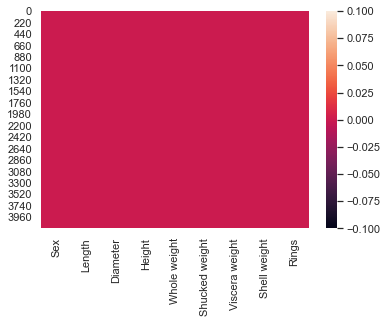

In [63]:
sns.heatmap(ds.isnull())
plt.show()

## Null value not present in dataset

In [64]:
ds.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

# Obsarvation:-
1. count of all the veriable are same, it indicate that dataset has no missing value.
2. Mean and Median for all columns are almost equal(minor difference ), means data set has very little skewness.
3. Not found very huge difference in mean and Max value , it means there could be very less outlier, will check outlier in next action for individual columns 
4. No Negative value exist in columns

<AxesSubplot:xlabel='Sex', ylabel='count'>

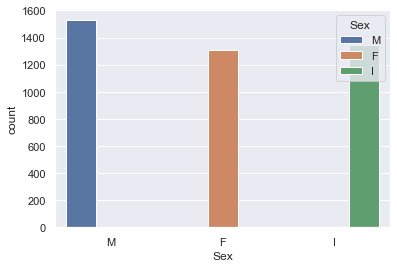

In [65]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Sex', hue='Sex', data=ds)

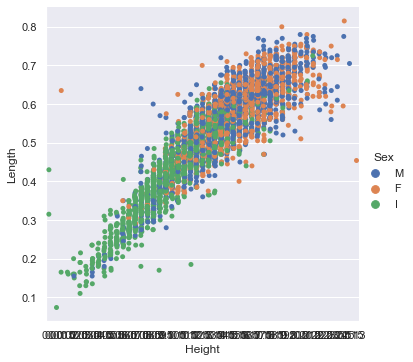

In [66]:
sns.catplot( x='Height', y="Length", hue="Sex",
             edgecolor="0.1",
            data=ds)

<AxesSubplot:xlabel='Rings', ylabel='count'>

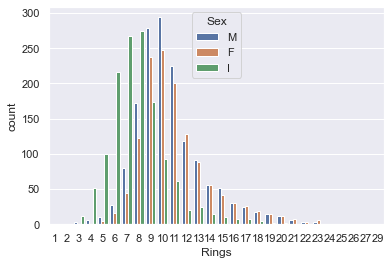

In [67]:
sns.countplot(x='Rings', hue='Sex', data=ds)

## Data is balanced.

In [32]:
# Encode Sex column in numerical values.
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
ds['Sex'] = label_quality.fit_transform(ds['Sex'])
ds['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [33]:
ds.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

<function matplotlib.pyplot.show(close=None, block=None)>

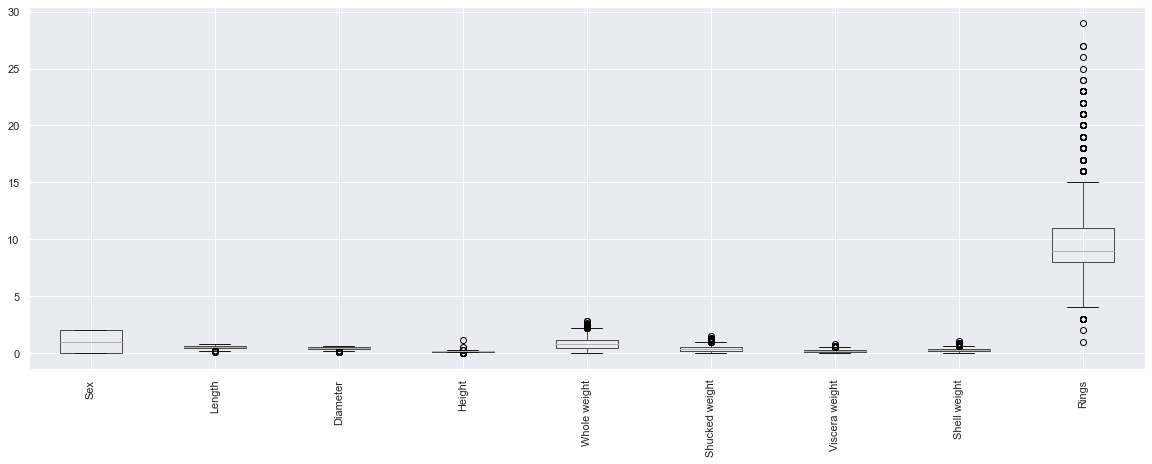

In [35]:
ds.boxplot(figsize=[20,8])
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.25)
plt.show

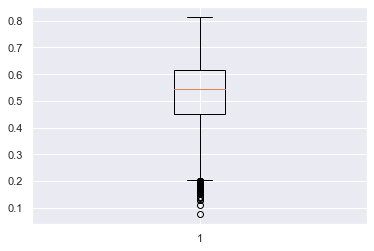

In [38]:
plt.boxplot(ds['Length'])
plt.show()

#### Outlier exist but very near to whiscor , hence not removing them.

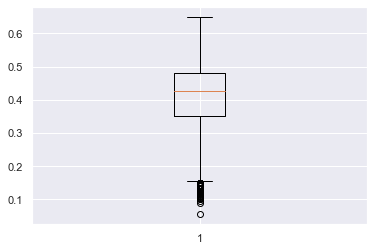

In [39]:
plt.boxplot(ds['Diameter'])
plt.show()

#### Outlier exist but very near to whiscor , hence not removing them.

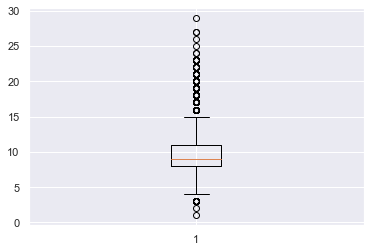

In [40]:
plt.boxplot(ds['Rings'])
plt.show()

### outlier for this column need to remove.

In [41]:
def outlier_IQR(data_frame, feature_name):
  IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
  lower_bridge = data_frame[feature_name].quantile(0.25) -(IQR*3)
  upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
  return (lower_bridge,upper_bridge)

In [42]:
l,u = outlier_IQR(ds, 'Rings')
ds.drop(ds[ (ds['Rings'] > u) | (ds['Rings'] < l) ].index, inplace=True)

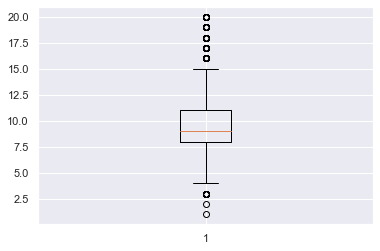

In [43]:
plt.boxplot(ds['Rings'])
plt.show()

### Outlier for Veriable Rings has been removed.

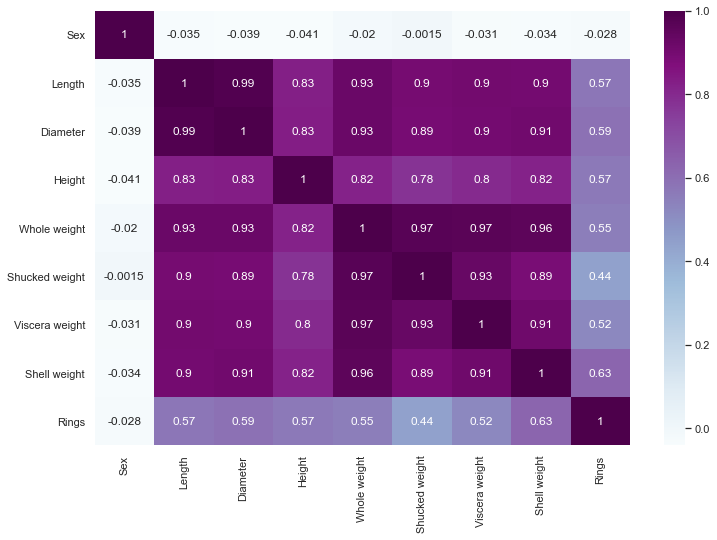

In [46]:
#Check for corelation.
fig=plt.figure(figsize=(12,8))
hc=ds.corr()
sns.heatmap(hc,annot=True,cmap="BuPu")
plt.show()

In [47]:
corr_matrix = ds.corr()
corr_matrix['Sex'].sort_values(ascending=False)

Sex               1.000000
Shucked weight   -0.001469
Whole weight     -0.019996
Rings            -0.028403
Viscera weight   -0.031136
Shell weight     -0.033636
Length           -0.035455
Diameter         -0.038730
Height           -0.040896
Name: Sex, dtype: float64

### All values are negativly correlated with Sex.

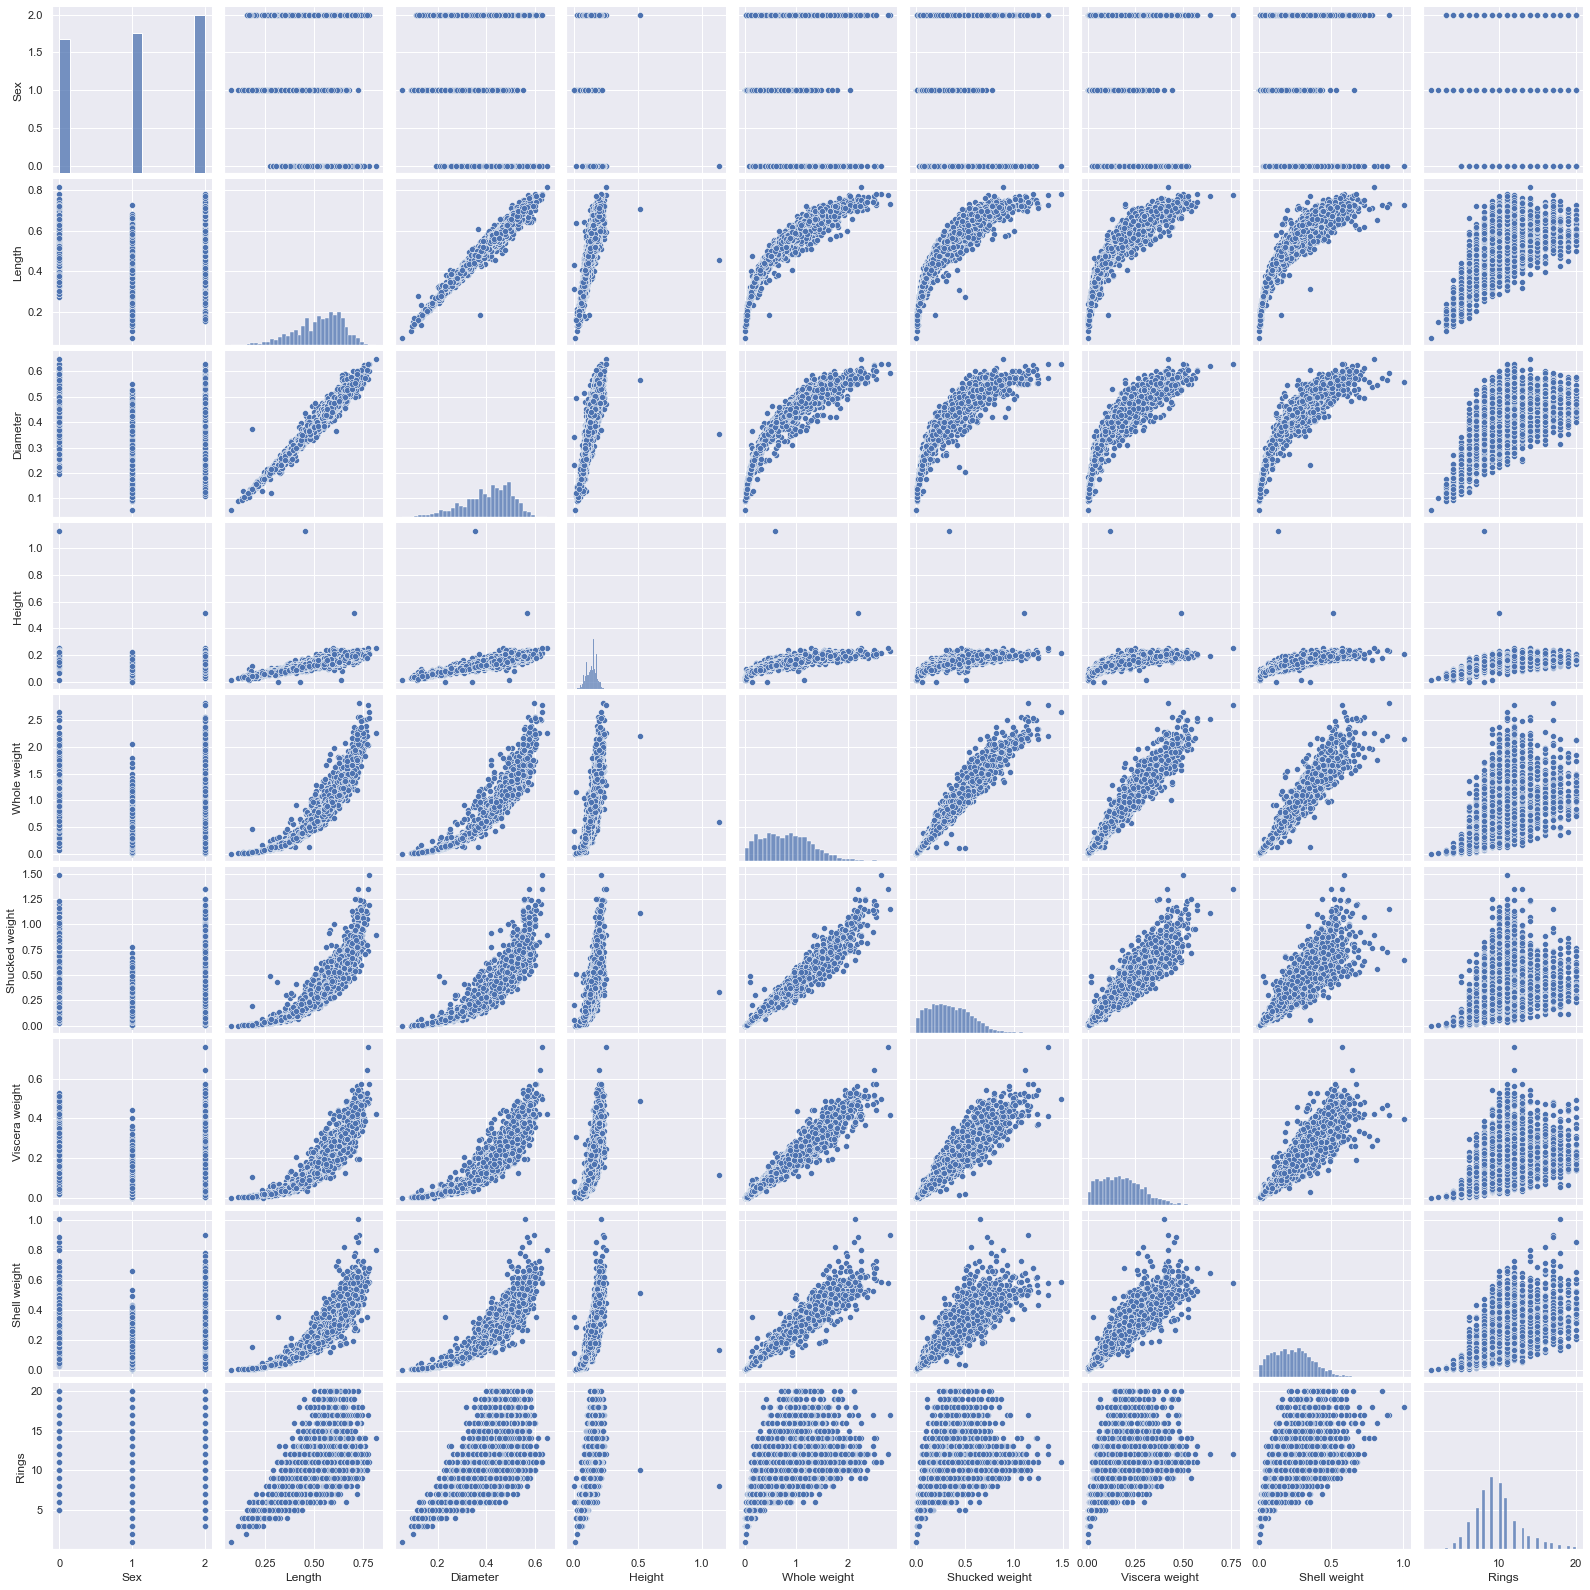

In [48]:
sns.pairplot(ds)